In [45]:
from Solvers import adv_solver, span_solver
from Adversary import Adversary, Problem
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Examples import exact_k, threshold_k
from copy import deepcopy as copy
import scipy

In [34]:
class SpanProgram():
    def __init__(self, problem, I_dict):
        self.target = np.ones(problem.no_len)
        self.num_vects = np.sum([len(v) for i, v in I_dict.items()])
        self.ordered_I = [pair for pair in itertools.product(tuple(range(problem.n)), problem.alphabet)]
        self.I_to_mat = {}
        self.counter = 0
        self.vect_list = []
        self.ticks = []
        for pair, v_set in I_dict.items():
            self.ticks.append(self.counter)
            self.I_to_mat[pair] = list(range(self.counter, self.counter + len(v_set)))
            self.counter += len(v_set)
            self.vect_list.append(*v_set)
        
        self.A = np.block(self.vect_list).T 
    
    def get_activated_A(self, x):
        activated_A = np.zeros(self.A.shape)
        for i in range(len(x)):
            interval = self.I_to_mat[(i, x[i])]
            activated_A[:, interval] = self.A[:, interval]
        return activated_A
        
        
    def apply(x, witness):
        return get_activated_A(x) @ witness
    
    def visualize_A(self):
        plt.imshow(self.A)
        plt.xticks(self.ticks, self.ordered_I)
        plt.colorbar()
        plt.show()
            
        

In [93]:
v, X = span_solver(exact_k(4, 1))
X = np.round(X, 8)

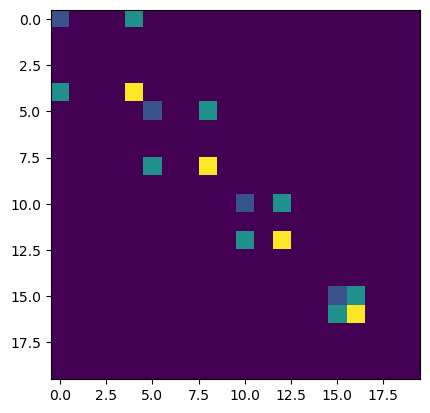

In [94]:
plt.imshow(X)

In [111]:
L = scipy.linalg.cholesky(X+ .0000000000000000001 * np.identity(X.shape[0]))
L = np.round(L, 7)
print(L.shape)

(20, 20)


In [116]:
np.linalg.matrix_rank(L.T)

4

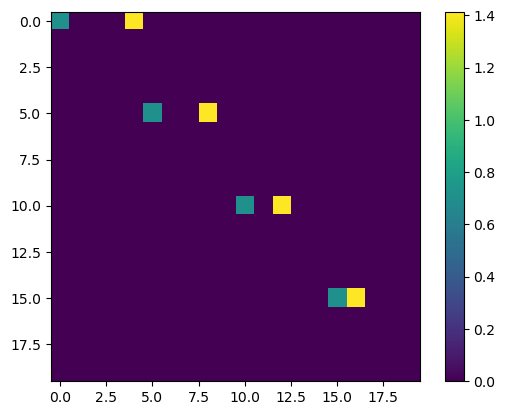

In [114]:
plt.imshow(L)
plt.colorbar()